# Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
train = pd.read_csv("D:/Analytical Problem/Loan Prediction problem/train.csv")
test = pd.read_csv("D:/Analytical Problem/Loan Prediction problem/test.csv")

In [3]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test_id = test.Loan_ID

# Exploring train data

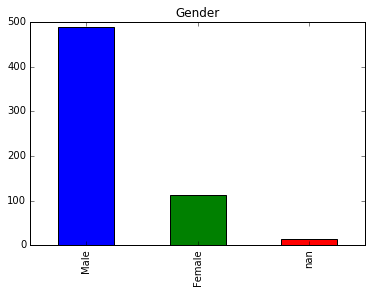

In [6]:
train.Gender.value_counts(dropna= False).plot.bar(title = "Gender");

* From above graph we can see that most of the applicants are Male. 
* There are few missing values too.

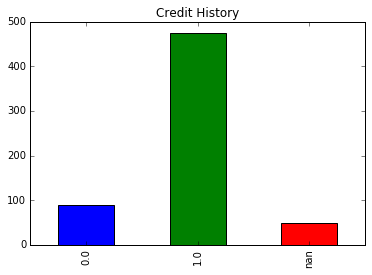

In [7]:
train.Credit_History.value_counts(dropna= False).sort_index().plot.bar(title = "Credit History");

* Majority Application have credit history. 
* Missing Values

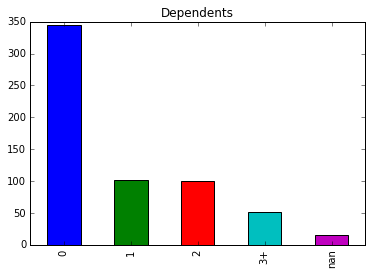

In [8]:
train.Dependents.value_counts(dropna= False).sort_index().plot.bar(title = "Dependents");

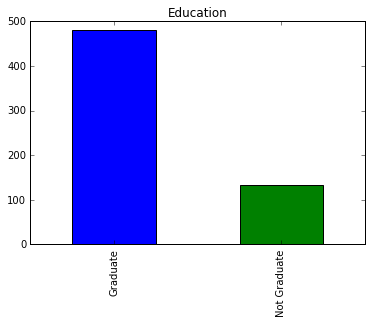

In [9]:
train.Education.value_counts(dropna= False).sort_index().plot.bar(title = "Education");

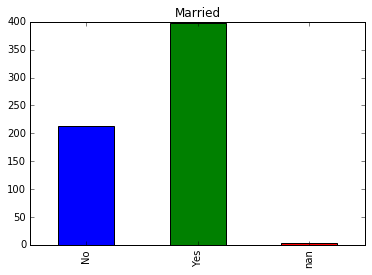

In [10]:
train.Married.value_counts(dropna= False).sort_index().plot.bar(title = "Married");

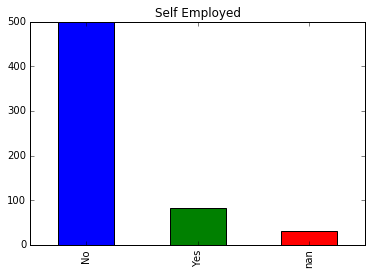

In [11]:
train.Self_Employed.value_counts(dropna= False).sort_index().plot.bar(title = "Self Employed");

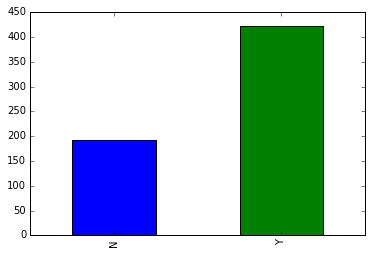

In [12]:
train.Loan_Status.value_counts(dropna= False).sort_index().plot.bar(title = "");

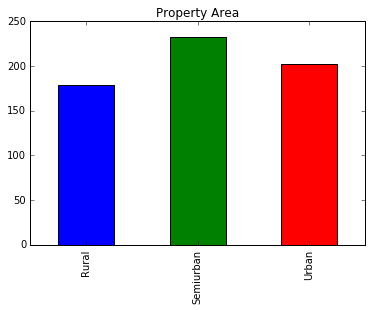

In [13]:
train.Property_Area.value_counts(dropna= False).sort_index().plot.bar(title = "Property Area");

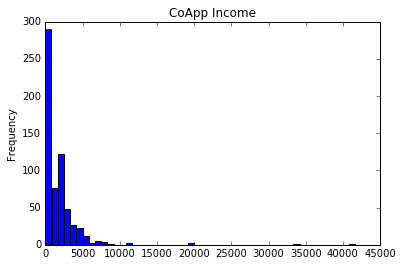

In [14]:
train.CoapplicantIncome.plot.hist(bins=50, title = "CoApp Income");

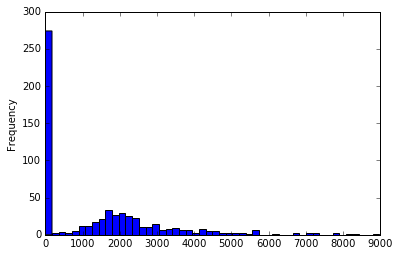

In [15]:
train[train['CoapplicantIncome'] < 10000]['CoapplicantIncome'].plot.hist(bins=50)

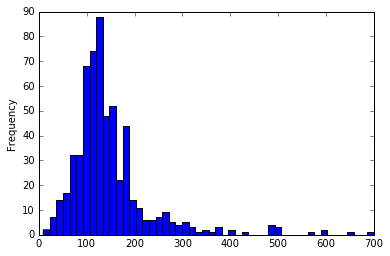

In [16]:
train.LoanAmount.plot.hist(bins=50)

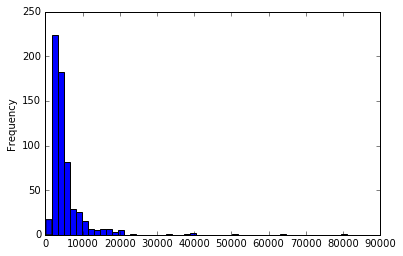

In [17]:
train.ApplicantIncome.plot.hist(bins=50)

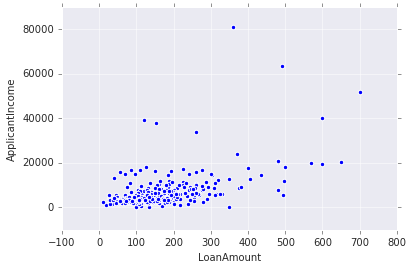

In [18]:
sns.set_style(style="darkgrid")
train.plot.scatter(x= "LoanAmount" , y="ApplicantIncome");

In [19]:
corr = train.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [20]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
train.groupby("Loan_Status").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


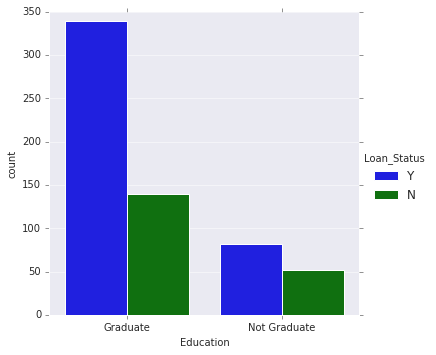

In [22]:
sns.catplot(x="Education",data=train,hue="Loan_Status",kind="count");

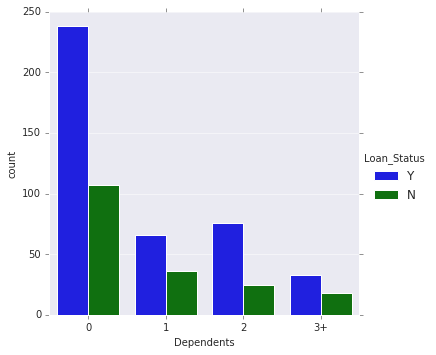

In [23]:
sns.catplot(x="Dependents",data=train,hue="Loan_Status",kind="count");

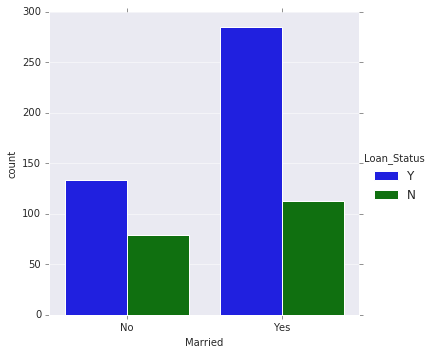

In [24]:
sns.catplot(x="Married",data=train,hue="Loan_Status",kind="count");

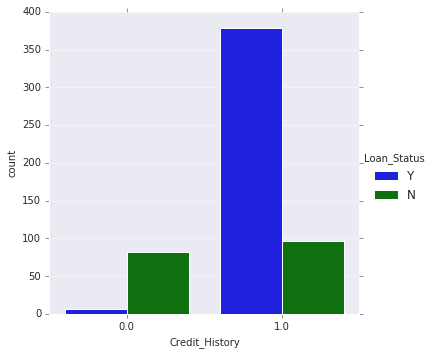

In [25]:
sns.catplot(x="Credit_History",data=train,hue="Loan_Status",kind="count");

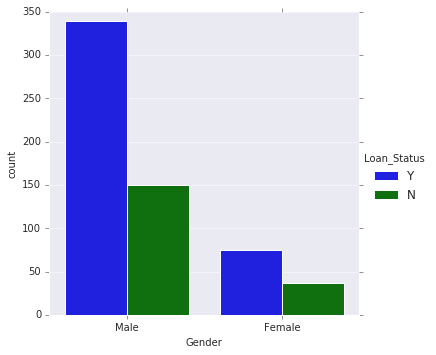

In [26]:
sns.catplot(x="Gender",data=train,hue="Loan_Status",kind="count");

In [27]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

C:\Users\sarra\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


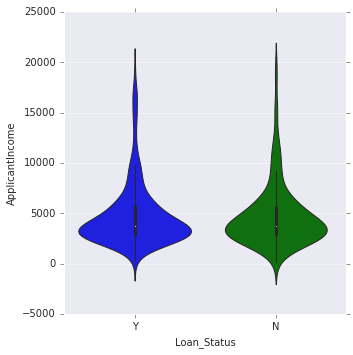

In [28]:
sns.catplot(x="Loan_Status",y="ApplicantIncome",kind="violin",data=train[train["ApplicantIncome"] < 20000]);

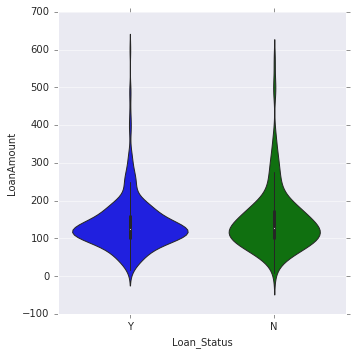

In [29]:
sns.catplot(x="Loan_Status",y="LoanAmount",kind="violin",data=train[train["ApplicantIncome"] < 20000]);

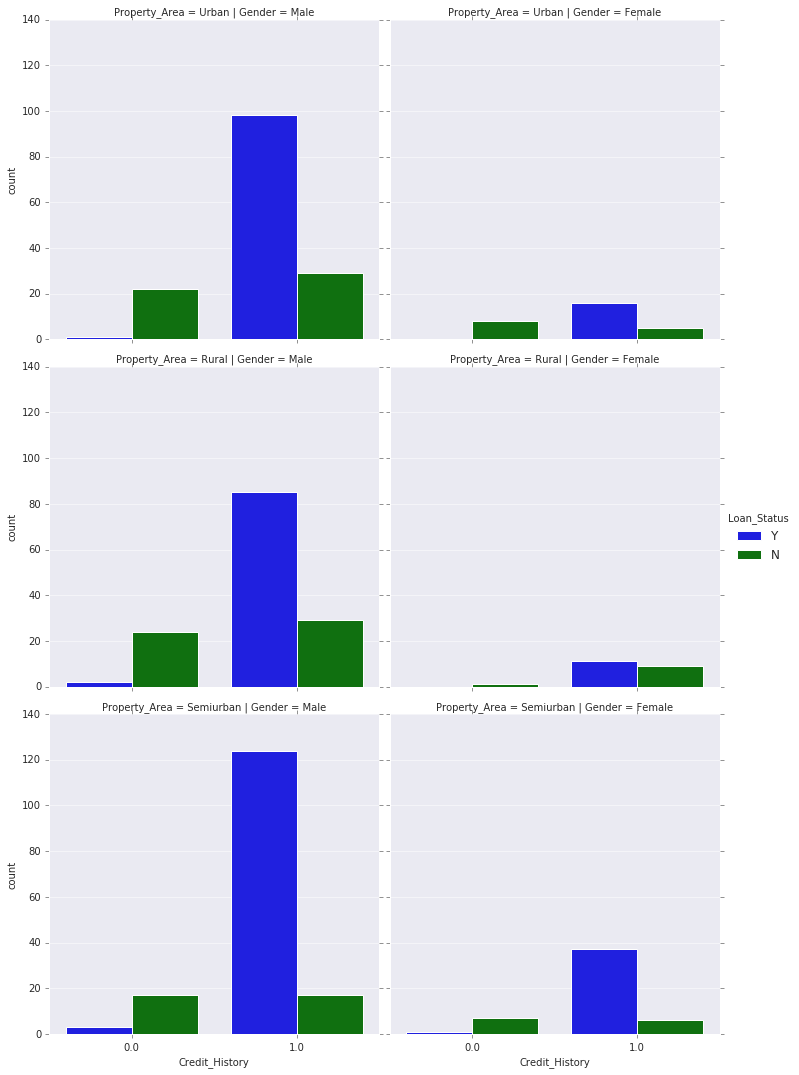

In [30]:
sns.catplot(x="Credit_History",data=train,hue="Loan_Status",kind="count",col="Gender",row="Property_Area")

In [31]:
temp = train.pivot_table(values="Loan_Status",index="Credit_History",aggfunc= lambda x:x.map({'Y':1,'N':0}).mean())

In [32]:
temp

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [33]:
float(len(train[(train["Credit_History"]== 0.0) & (train["Loan_Status"]=='Y')]) / float(len(train[train["Credit_History"]==0])))

0.07865168539325842

In [34]:
train.ApplicantIncome.skew()

6.539513113994623

In [35]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [36]:
all_data = pd.concat((train,test)).reset_index(drop=True)

C:\Users\sarra\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [37]:
train.shape

(614, 13)

In [38]:
test.shape

(367, 12)

In [39]:
all_data.shape

(981, 13)

In [40]:
all_data["ToatlIncome"] = all_data.ApplicantIncome + all_data.CoapplicantIncome
all_data["TotalIncome_log"] = np.log(all_data["ToatlIncome"])

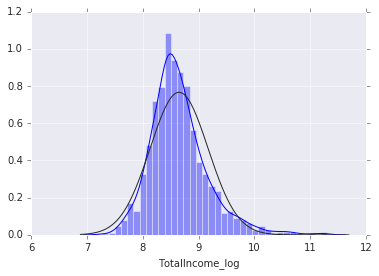

In [41]:
from scipy.stats import norm
sns.distplot(all_data.TotalIncome_log,fit=norm)

In [42]:
all_data.TotalIncome_log.skew()

1.1234747415439186

In [43]:
all_data_na = all_data.isnull().sum() 
all_data_na = all_data_na[all_data_na!=0].sort_values(ascending=False)
all_data_na

Loan_Status         367
Credit_History       79
Self_Employed        55
LoanAmount           27
Dependents           25
Gender               24
Loan_Amount_Term     20
Married               3
dtype: int64

In [44]:
all_data.Credit_History.fillna(0,inplace=True)

In [45]:
all_data.Self_Employed.fillna(all_data.Self_Employed.mode()[0],inplace = True)

In [46]:
pvt = all_data.pivot_table(index="Credit_History",columns="Education",values="LoanAmount",aggfunc = np.median)

In [47]:
def lnamt(x):
    return pvt.loc[x['Credit_History'],x['Education']]
all_data.LoanAmount.fillna(all_data[all_data.LoanAmount.isnull()].apply(lnamt,axis=1),inplace=True)

In [48]:
all_data.Dependents.fillna(all_data.Dependents.mode()[0],inplace=True)
all_data.Gender.fillna(all_data.Gender.mode()[0],inplace=True)
all_data.Loan_Amount_Term.fillna(all_data.Loan_Amount_Term.mode()[0],inplace=True)
all_data.Married.fillna(all_data.Married.mode()[0],inplace=True)

In [49]:
all_data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
ToatlIncome            0
TotalIncome_log        0
dtype: int64

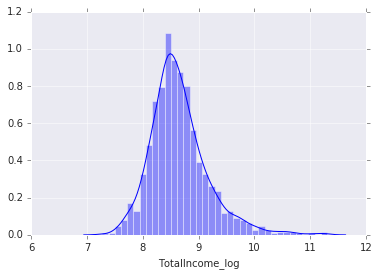

In [50]:
all_data['TotalIncome'] = all_data.CoapplicantIncome + all_data.ApplicantIncome
all_data['TotalIncome_log'] = np.log(all_data['TotalIncome'])
sns.distplot(all_data['TotalIncome_log'])

In [51]:
df = all_data.copy()
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
ToatlIncome          981 non-null float64
TotalIncome_log      981 non-null float64
TotalIncome          981 non-null float64
dtypes: float64(7), int64(1), object(8)
memory usage: 122.7+ KB


In [52]:
df.drop(['CoapplicantIncome','ApplicantIncome','TotalIncome','ToatlIncome'],axis=1,inplace=True)

In [53]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 11 columns):
Credit_History      981 non-null float64
Dependents          981 non-null object
Education           981 non-null object
Gender              981 non-null object
LoanAmount          981 non-null float64
Loan_Amount_Term    981 non-null float64
Loan_Status         614 non-null object
Married             981 non-null object
Property_Area       981 non-null object
Self_Employed       981 non-null object
TotalIncome_log     981 non-null float64
dtypes: float64(4), object(7)
memory usage: 84.4+ KB


In [54]:
df.Loan_Status.replace({'N':0,'Y':1},inplace=True)
df.Loan_Status.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [55]:
var = ['Married', 'Gender','Education','Self_Employed']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for v in var:
    df[v] = le.fit_transform(df[v])

In [56]:
df_new = pd.get_dummies(df)

In [57]:
df_new.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
Credit_History             981 non-null float64
Education                  981 non-null int64
Gender                     981 non-null int64
LoanAmount                 981 non-null float64
Loan_Amount_Term           981 non-null float64
Loan_Status                614 non-null float64
Married                    981 non-null int64
Self_Employed              981 non-null int64
TotalIncome_log            981 non-null float64
Dependents_0               981 non-null uint8
Dependents_1               981 non-null uint8
Dependents_2               981 non-null uint8
Dependents_3+              981 non-null uint8
Property_Area_Rural        981 non-null uint8
Property_Area_Semiurban    981 non-null uint8
Property_Area_Urban        981 non-null uint8
dtypes: float64(5), int64(4), uint8(7)
memory usage: 75.8 KB


In [58]:
train_data = df_new[:len(train)].copy()
test_data = df_new[len(train):].copy()

In [59]:
print len(train_data)
print len(test_data)

614
367


In [60]:
y = train_data['Loan_Status']
test_data.drop(['Loan_Status'],axis=1,inplace=True)
train_data.drop(['Loan_Status'],axis=1,inplace=True)
x = train_data

In [61]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
x_train_sp , x_test_sp, y_train_sp, y_test_sp = train_test_split(x, y, test_size=0.25,random_state=11)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

C:\Users\sarra\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [63]:
lr = LogisticRegression()
lr.fit(x_train_sp,y_train_sp)
pred = lr.predict(x_test_sp)
print metrics.accuracy_score(pred,y_test_sp)

0.7727272727272727


In [64]:
ds = DecisionTreeClassifier()
ds.fit(x_train_sp,y_train_sp)
pred = ds.predict(x_test_sp)
print metrics.accuracy_score(pred,y_test_sp)

0.6038961038961039


In [65]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(x_train_sp,y_train_sp)
pred = rf.predict(x_test_sp)
print metrics.accuracy_score(pred,y_test_sp)

0.7207792207792207


In [66]:
metrics.accuracy_score(lr.predict(x_train_sp),y_train_sp)

0.7652173913043478

In [67]:
print metrics.accuracy_score(ds.predict(x_train_sp),y_train_sp)
print metrics.accuracy_score(rf.predict(x_train_sp),y_train_sp)

1.0
1.0


In [68]:
ds.feature_importances_

array([0.16065415, 0.03384507, 0.02406853, 0.2438831 , 0.05525279,
       0.02144524, 0.0362889 , 0.28298252, 0.01447419, 0.02013305,
       0.0198619 , 0.0397736 , 0.00695957, 0.02195108, 0.0184263 ])

In [69]:
dsprun = DecisionTreeClassifier(max_depth = 5, random_state = 0, min_samples_split = 20)
dscv = cross_val_score(dsprun,x,y,cv=10)

In [70]:
np.mean(dscv)

0.7473067915690865

In [71]:
np.mean(cross_val_score(rf,x,y,cv=10))

0.744184231069477

In [72]:
rf.feature_importances_

array([0.15217143, 0.02960209, 0.03105421, 0.25372097, 0.05481663,
       0.0310416 , 0.02772753, 0.27248213, 0.02433478, 0.01945305,
       0.01575538, 0.01697986, 0.02403517, 0.02619167, 0.02063348])

In [73]:
rf_fimp = rf.feature_importances_
feat = list(x.columns)
df_rfimp = pd.DataFrame({'Feature':feat,'Score':rf_fimp})

In [81]:
df_rfimp.sort_values(by="Score",ascending=False)

,Feature,Score
7,TotalIncome_log,0.272482
3,LoanAmount,0.253721
0,Credit_History,0.152171
4,Loan_Amount_Term,0.054817
2,Gender,0.031054
5,Married,0.031042
1,Education,0.029602
6,Self_Employed,0.027728
13,Property_Area_Semiurban,0.026192
8,Dependents_0,0.024335


In [75]:
xt = x[['Credit_History','Education','Married','Self_Employed','Property_Area_Rural','Property_Area_Urban',
        'Property_Area_Semiurban']]
rft = RandomForestClassifier(n_estimators=150)
rftcv = cross_val_score(rft,xt,y,cv=10)
print np.mean(rftcv)
print rftcv

0.7360395524329949
[0.73015873 0.77777778 0.75409836 0.6557377  0.72131148 0.67213115
 0.7704918  0.78688525 0.73770492 0.75409836]


In [112]:
#Now trying with top 6 features
xtop6 = x[['Credit_History','Married','TotalIncome_log','LoanAmount','Loan_Amount_Term','Gender']]
rft = RandomForestClassifier(n_estimators=150,max_depth=7)
rftcv2 = cross_val_score(rft,xt,y,cv=10,scoring='accuracy')
print np.mean(rftcv2)
print rftcv2

0.7376788966952901
[0.73015873 0.77777778 0.7704918  0.63934426 0.73770492 0.67213115
 0.7704918  0.7704918  0.73770492 0.7704918 ]


In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier(n_neighbors=13)
knncv = cross_val_score(knn,x,y,cv=5)
print np.mean(knncv)
print knncv

0.6709941829719726
[0.68548387 0.66129032 0.67213115 0.70491803 0.63114754]


In [111]:
knn = KNeighborsClassifier(n_neighbors=18)
knncv = cross_val_score(knn,xtop6,y,cv=5)
print np.mean(knncv)
print knncv

0.6677154944473823
[0.67741935 0.66935484 0.68852459 0.68032787 0.62295082]


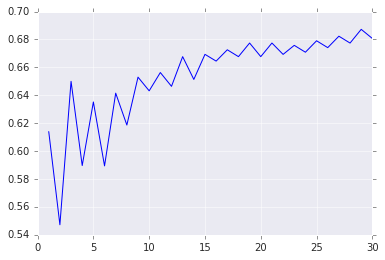

In [116]:
kscore = []
for n in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=n)
    knncv = cross_val_score(knn,xtop6,y,cv=5,scoring='accuracy')
    kscore.append(knncv.mean())
plt.plot(list(range(1,31)),kscore)
plt.show()

In [3]:
train.ApplicantIncome.mean()

5403.459283387622